In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
output_dir = "../.."

In [3]:
all_scores = list(Path("../../outputs/encoders").glob("*/*/scores.csv"))
all_scores_keys = [
    (x.parent.name, x.parents[1].name)
    for x in all_scores
]

In [4]:
all_scores_keys

[('EC183', 'next_phoneme'),
 ('EC152', 'next_phoneme'),
 ('EC195', 'next_phoneme'),
 ('EC196', 'next_phoneme'),
 ('EC212', 'next_phoneme'),
 ('EC212', 'baseline'),
 ('EC196', 'baseline'),
 ('EC195', 'baseline'),
 ('EC152', 'baseline'),
 ('EC183', 'baseline'),
 ('EC152', 'phoneme8'),
 ('EC183', 'phoneme8'),
 ('EC195', 'phoneme8'),
 ('EC212', 'phoneme8'),
 ('EC196', 'phoneme8'),
 ('EC152', 'random8'),
 ('EC183', 'random8'),
 ('EC212', 'random8'),
 ('EC196', 'random8'),
 ('EC195', 'random8'),
 ('EC212', 'phoneme'),
 ('EC196', 'phoneme'),
 ('EC195', 'phoneme'),
 ('EC152', 'phoneme'),
 ('EC183', 'phoneme'),
 ('EC183', 'syllable'),
 ('EC152', 'syllable'),
 ('EC195', 'syllable'),
 ('EC196', 'syllable'),
 ('EC212', 'syllable')]

In [5]:
all_scores_df = pd.concat([
    pd.read_csv(x) for x in all_scores
], keys=all_scores_keys, names=["subject", "model"]).reset_index(level=2, drop=True)
all_scores_df

fold  output_dim     score output_name
subject model                                               
EC183   next_phoneme     0           0 -0.006970          G1
        next_phoneme     1           0 -0.004104          G1
        next_phoneme     2           0 -0.001908          G1
        next_phoneme     0           1 -0.001237          G2
        next_phoneme     1           1 -0.002333          G2
...                    ...         ...       ...         ...
EC212   syllable         1         382 -0.000513       PG127
        syllable         2         382 -0.000302       PG127
        syllable         0         383 -0.000846       PG128
        syllable         1         383 -0.002415       PG128
        syllable         2         383 -0.000143       PG128

[25344 rows x 4 columns]

In [11]:
all_scores_df.groupby(["subject", "model", "output_name"]).score.mean().groupby(["subject", "model"]).max().sort_values(ascending=False)

subject  model       
EC183    syllable        0.351381
         random8         0.351376
         phoneme         0.351375
         baseline        0.351374
         phoneme8        0.351373
         next_phoneme    0.351372
EC152    syllable        0.224858
         baseline        0.224855
         phoneme         0.224854
         phoneme8        0.224849
         next_phoneme    0.224849
         random8         0.224819
EC212    syllable        0.210618
         random8         0.210370
         phoneme8        0.210347
         next_phoneme    0.210341
         phoneme         0.210338
         baseline        0.210337
EC196    syllable        0.146965
         baseline        0.146955
         next_phoneme    0.146953
         phoneme         0.146952
         random8         0.146950
         phoneme8        0.146947
EC195    random8         0.137661
         phoneme8        0.137656
         next_phoneme    0.137654
         syllable        0.137653
         phoneme         0

<Axes: xlabel='model', ylabel='subject'>

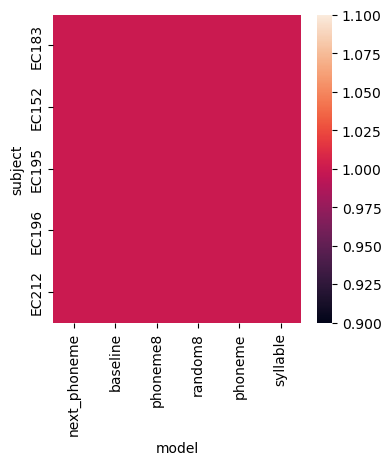

In [6]:
covered_models = list(all_scores_df.index.get_level_values("model").unique())
covered_subjects = list(all_scores_df.index.get_level_values("subject").unique())
coverage_df = pd.DataFrame(np.zeros((len(covered_subjects), len(covered_models))),
                           columns=pd.Index(covered_models, name="model"),
                            index=pd.Index(covered_subjects, name="subject"))
for subject, model in all_scores_keys:
    coverage_df.loc[subject, model] = 1
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(coverage_df)

In [7]:
all_electrodes = list(Path("../../outputs/encoders").glob("*/*/electrodes.csv"))
all_electrodes_df = pd.concat(
    [pd.read_csv(x) for x in all_electrodes],
    keys=[x.parent.name for x in all_electrodes],
    names=["subject"]
).set_index("label", append=True).reset_index(level=1, drop=True)
all_electrodes_df = all_electrodes_df[~all_electrodes_df.index.duplicated()]
all_electrodes_df

long_name   type                         roi
subject label                                                       
EC183   G1                  Grid1   grid              middletemporal
        G2                  Grid2   grid              middletemporal
        G3                  Grid3   grid              middletemporal
        G4                  Grid4   grid              middletemporal
        G5                  Grid5   grid              middletemporal
...                           ...    ...                         ...
EC212   HD8     HippocampalDepth8  depth  Left-Cerebral-White-Matter
        HD9     HippocampalDepth9  depth       ctx_lh_S_temporal_inf
        HD10   HippocampalDepth10  depth       ctx_lh_G_temporal_inf
        EKG                   EKG    EKG                          []
        REF             Reference  strip                          []

[1668 rows x 3 columns]

In [8]:
all_scores_df.to_csv(Path(output_dir) / "all_encoding_scores.csv")
all_electrodes_df.to_csv(Path(output_dir) / "all_electrodes.csv")